In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
df=sns.load_dataset('taxis')

In [53]:
df

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


In [54]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [55]:
for i in df.columns:
    if df[i].dtypes=='object':
        print('*'*30)
        print(f'Number of unique Categories in {i}={len(df[i].unique())}')
        print('*'*30)

******************************
Number of unique Categories in color=2
******************************
******************************
Number of unique Categories in payment=3
******************************
******************************
Number of unique Categories in pickup_zone=195
******************************
******************************
Number of unique Categories in dropoff_zone=204
******************************
******************************
Number of unique Categories in pickup_borough=5
******************************
******************************
Number of unique Categories in dropoff_borough=6
******************************


In [56]:
for i in ['payment','pickup_zone','dropoff_zone','pickup_borough','dropoff_borough']:
    df[i]=df[i].fillna(df[i].mode()[0])
df.isna().sum()

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64

In [57]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

In [58]:
numeric_cols

['passengers', 'distance', 'fare', 'tip', 'tolls', 'total']

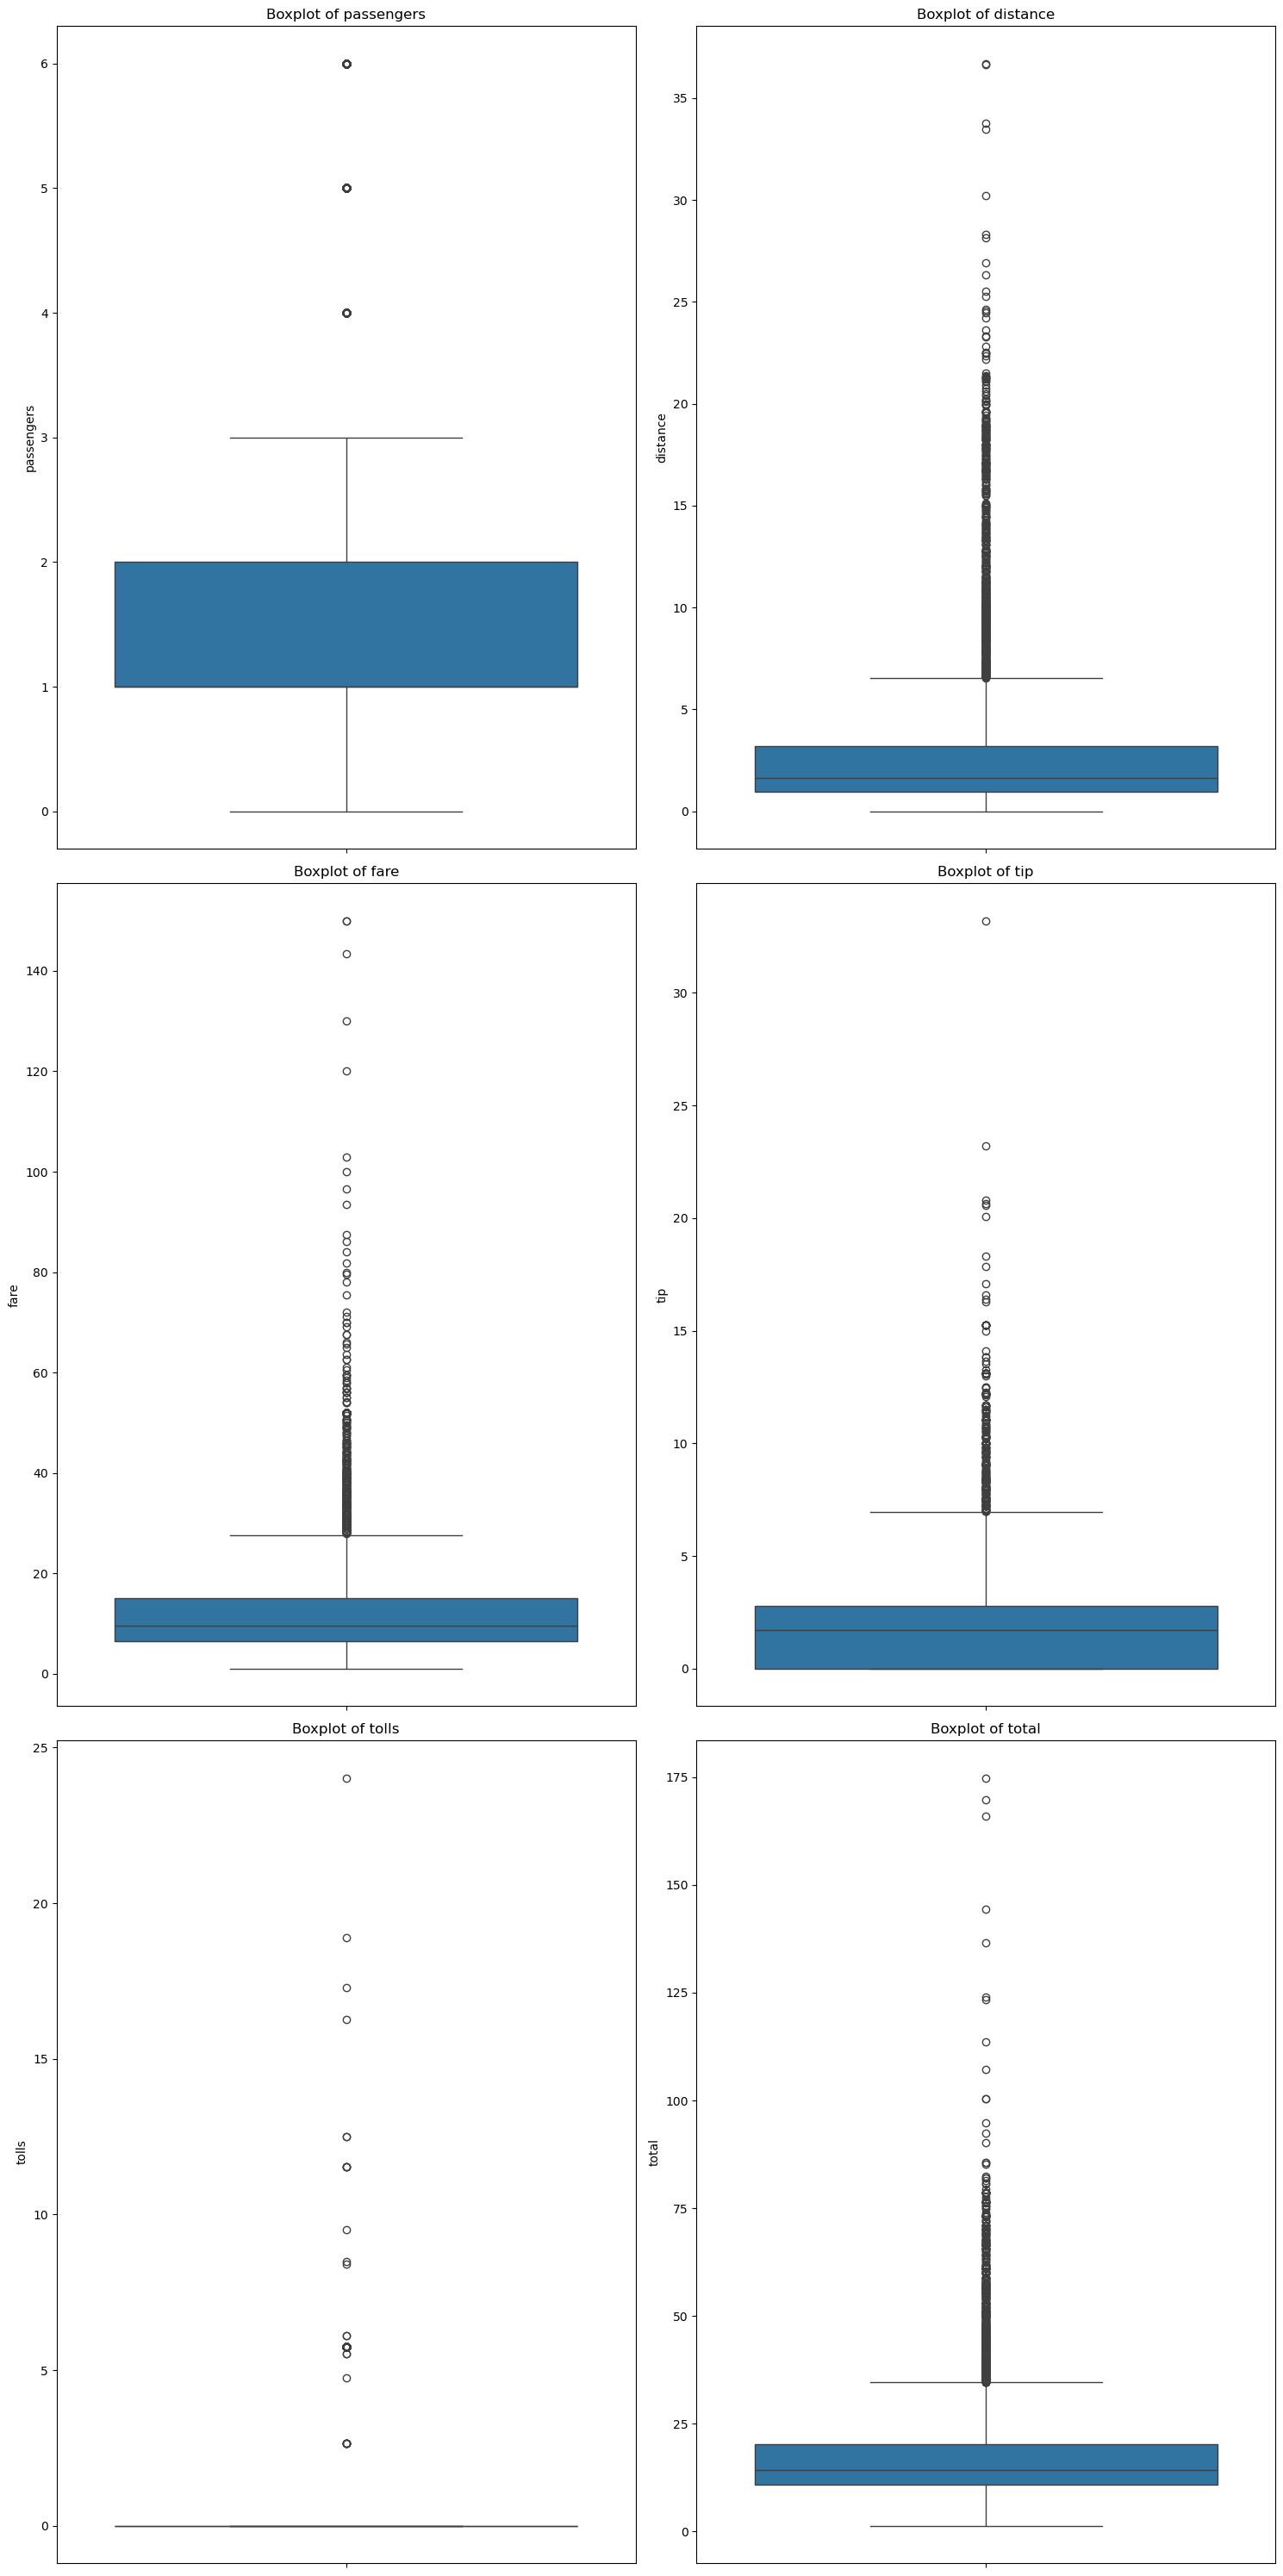

In [59]:
plt.figure(figsize=(15,30))

for i,col in enumerate(numeric_cols, 1):
    plt.subplot(3,2,i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()

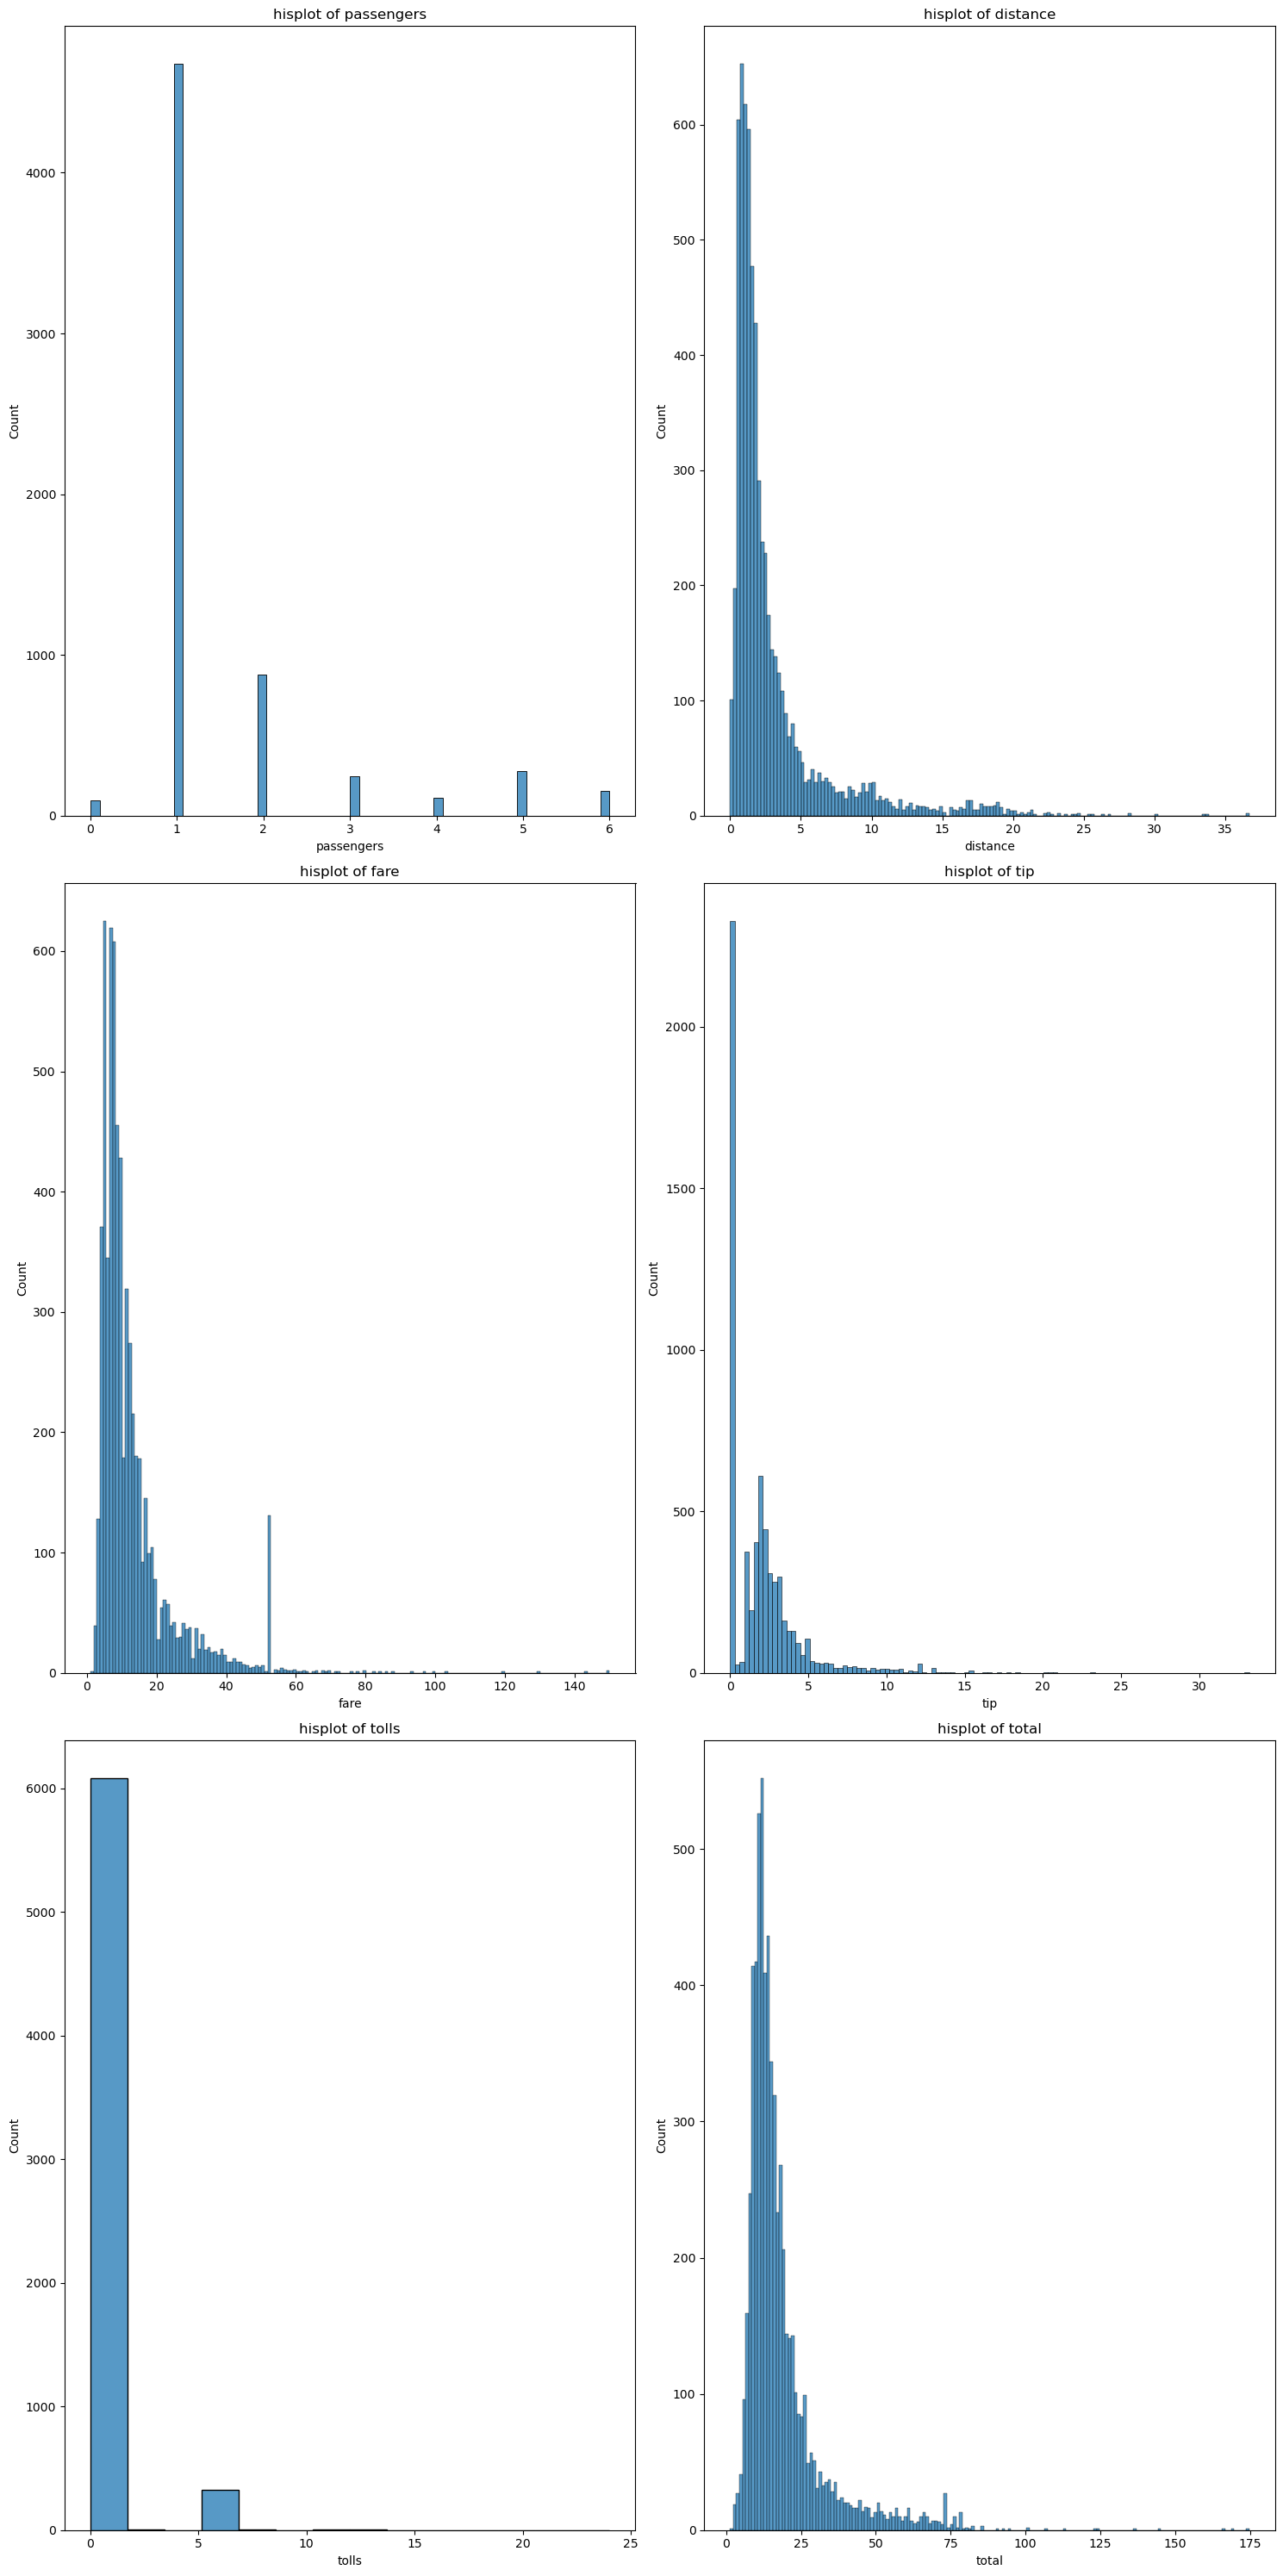

In [60]:
plt.figure(figsize=(15,30))

for i,col in enumerate(numeric_cols, 1):
    plt.subplot(3,2,i)
    sns.histplot(x=df[col])
    plt.title(f'hisplot of {col}')
    plt.tight_layout()
plt.show()

In [61]:
def treat_outliers_iqr(df, columns):
    df_treated = df.copy()
    for col in columns:
        Q1 = df_treated [col].quantile(0.25)
        Q3 = df_treated [col].quantile(0.75)
        IQR=Q3-Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Cap the outliers
        df_treated [col] = np.where(df_treated [col] < lower_bound, lower_bound, df_treated [col]) 
        df_treated [col] = np.where(df_treated[col] > upper_bound, upper_bound, df_treated [col]) 
    return df_treated

df_clean = treat_outliers_iqr(df, numeric_cols)

print("Original Data:")

print(df.shape[0])

print("\nData after treating outliers in continuous columns:") 
print(df_clean.shape[0])


Original Data:
6433

Data after treating outliers in continuous columns:
6433


In [68]:
#To delet no.of outliers
def remove_outliers_iqr(df, columns):
    df_treated = df.copy()
    for col in columns:
        Q1 = df_treated[col].quantile(0.25)
        Q3 = df_treated[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_treated = df_treated[(df_treated[col] >= lower_bound) & (df_treated[col] <= upper_bound)]
    return df_treated  
df_no_outliers = remove_outliers_iqr(df, numeric_cols)

print("Original Data:")
print(df.shape[0])
print("\nData after deleting outliers in continuous columns:") 
print(df_no_outliers.shape[0])

Original Data:
6433

Data after deleting outliers in continuous columns:
4981


In [69]:
data_loss=((df.shape[0]-df_no_outliers.shape[0])/df.shape[0])*100
data_loss

22.571117674490907

In [70]:
from scipy.stats import zscore

In [72]:
def remove_outliers_zscore(df, columns, threshold=3): 
    df_clean = df.copy()
    # Calculate z-scores only on continuous columns 
    z_scores = np.abs(zscore(df_clean[columns])) 
    # Keep rows where all z-scores are below the threshold 
    mask = (z_scores < threshold).all(axis=1) 
    df_clean = df_clean [mask]
    return df_clean

df_no_outliers = remove_outliers_zscore(df, numeric_cols)

print("Original Data:")
print(df.shape[0])
print("\nData after removing outliers using Z-score:") 
print(df_no_outliers.shape[0])

Original Data:
6433

Data after removing outliers using Z-score:
5852


In [73]:
data_loss=((df.shape[0]-df_no_outliers.shape[0])/df.shape[0])*100
data_loss

9.031556039173013